In [1]:
%load_ext autoreload
%autoreload 2

In [101]:
import pickle as pkl
import torch
from pathlib import Path
from typing import List, Tuple
from PIL import Image, ImageDraw, ImageFont
import os
import json
import numpy as np
import cv2 as cv
from copy import deepcopy

In [35]:
from drawlib import *

# Part 1: scribbles

In [6]:
IMGRES = 256
IMGRES = 512     # for appendix


def get_image_draws(exppath, label=None, which=(0, (0,)), imgsize=IMGRES, use_seg=False):
    with open(Path(exppath) / "outbatches.pkl", "rb") as f:
        outbatches = pkl.load(f)

    imagerow = []
    for whichspec in which:
        batchid, whichseeds = whichspec
        outbatch = outbatches[batchid]
        for whichseed in whichseeds:
            example = outbatch[whichseed]
            imgdata = example.image_data if not use_seg else example.seg_data.convert("L")
            imagerow.append(DrawImage(imgdata, imgsize=imgsize))
        imagerow.append(Draw(20, 0))
    del imagerow[-1]
    return DrawRow(*imagerow)    


def display_bboxes(bboxes, prompts=None, size=(512, 512), _img=None, linewidth=3):
    img = Image.new(mode="RGB", size=size) if _img is None else _img.copy()
    width, height = img.size
    imdraw = ImageDraw.Draw(img)
    if prompts is None:
        prompts = [None] * len(bboxes)
    for bbox, prompt in zip(bboxes, prompts):
        imdraw.rectangle([(int(bbox[0] * width), int(bbox[1] * height)), (int(bbox[2] * width), int(bbox[3] * height))], outline=(255, 0, 0), width=linewidth)
        if prompt is not None:
            imdraw.text((int(bbox[0] * width), int(bbox[1] * height)), prompt, font_size=32)
    return img



In [13]:
def get_image_draw(exppath, whichbatch=0, whichseed=0, imgsize=256, use_seg=False):
    with open(Path(exppath) / "outbatches.pkl", "rb") as f:
        outbatches = pkl.load(f)
        
    with open(Path(exppath) / "args.json") as f:
        args = json.load(f)

    imagerow = []
    outbatch = outbatches[whichbatch]
    example = outbatch[whichseed]
    imgdata = example.image_data if not use_seg else example.seg_data2.convert("L")
    ret = DrawImage(imgdata, imgsize=imgsize)
    return ret, args


/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 289
(774, 289)


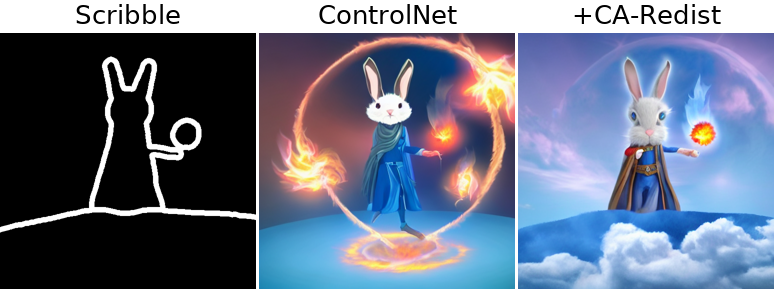

In [138]:
whichbatch = 2
whichseed = 1

imgs = []
labeltexts = []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_extradev.pkl_1", whichbatch, whichseed, use_seg=True)
paramtext = DrawText(f"Scribble", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_extradev.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"ControlNet", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_scribbles/generated_extradev.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"+CA-Redist", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 289
(774, 289)


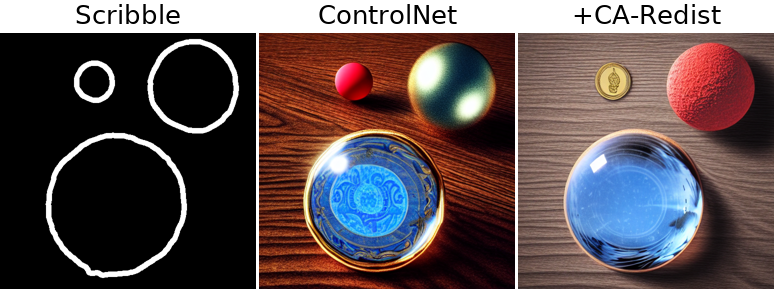

In [139]:
whichbatch = 0
whichseed = 0

imgs = []
labeltexts = []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_extradev.pkl_1", whichbatch, whichseed, use_seg=True)
paramtext = DrawText(f"Scribble", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_extradev.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"ControlNet", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_scribbles/generated_extradev.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"+CA-Redist", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 289
(774, 289)


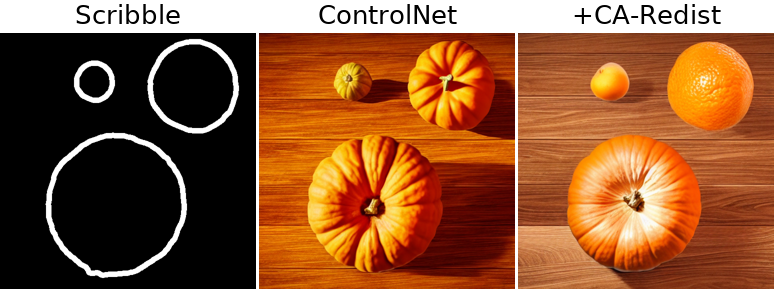

In [140]:
whichbatch = 3
whichseed = 3

imgs = []
labeltexts = []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_threeorange1.pkl_1", whichbatch, whichseed, use_seg=True)
paramtext = DrawText(f"Scribble", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_scribbles/generated_threeorange1.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"ControlNet", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_scribbles/generated_threeorange1.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"+CA-Redist", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

# Part 2: Canny edges

### Example 1: pumpkin, orange and apricot but with edges from another example

['a highly detailed photorealistic image of {an apricot:7924463}, {a pumpkin:8606816} and {an orange:8600493} on {a wooden table:15835924}.']


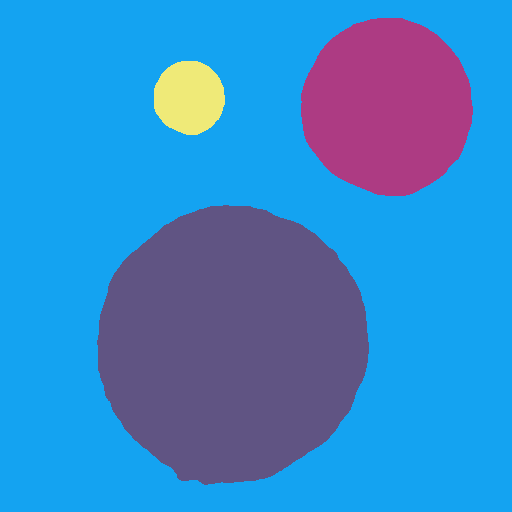

In [120]:
d = pkl.load(open("/USERSPACE/lukovdg1/controlnet11/evaldata/threeorange1.pkl", "rb"))
print(d[3].captions)
display(d[3].image_data)

example1 = deepcopy(d[3])

In [121]:
d = pkl.load(open("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_scribbles/generated_threeorange1.pkl_1/outbatches.pkl", "rb"))

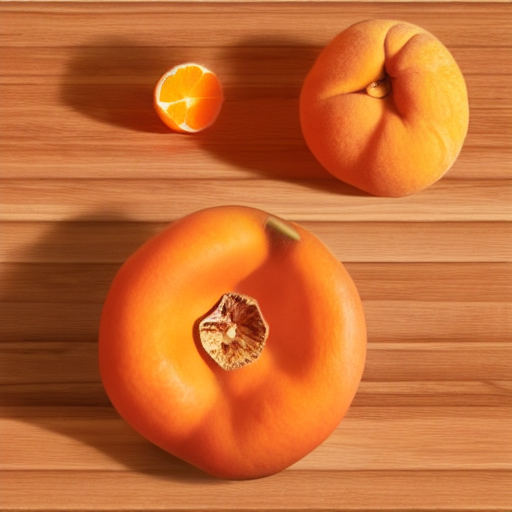

In [122]:
img = d[6][2].image_data
display(img)

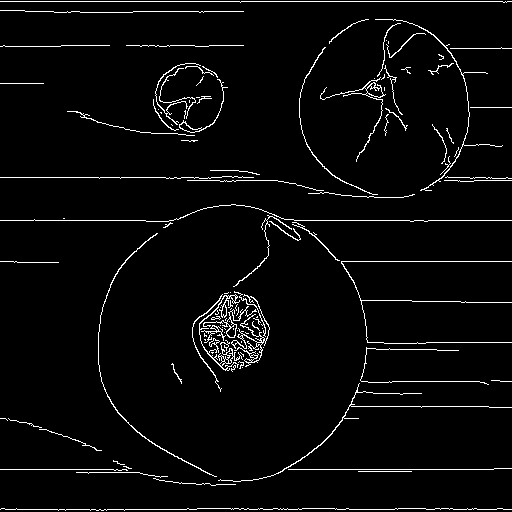

In [123]:
cond_imgtensor_np = np.array(img).astype("uint8")
canny = Image.fromarray(cv.Canny(cond_imgtensor_np, 80, 160))
display(canny)
example1.canny_data = canny

### Example 2: blue crystal ball and red tennis ball etc but canny from oranges (same as example 1)

['a highly detailed photorealistic image of {a gold coin:7069951}, {a blue crystal ball:5633996} and {a red tennis ball:3584971} on {a wooden table:10236894}.']


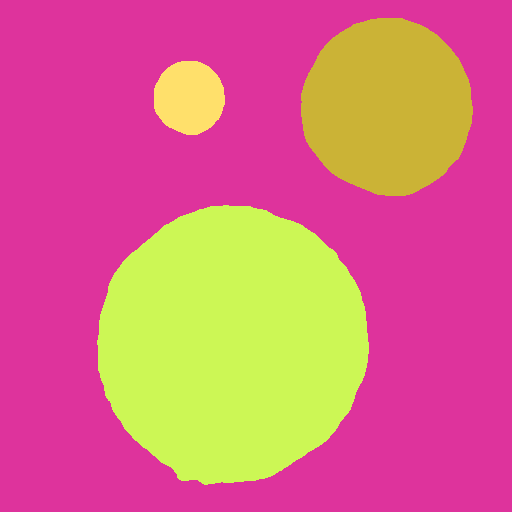

In [124]:
d = pkl.load(open("/USERSPACE/lukovdg1/controlnet11/evaldata/extradev.pkl", "rb"))
print(d[0].captions)
display(d[0].image_data)

example2 = deepcopy(d[0])

example2.canny_data = canny

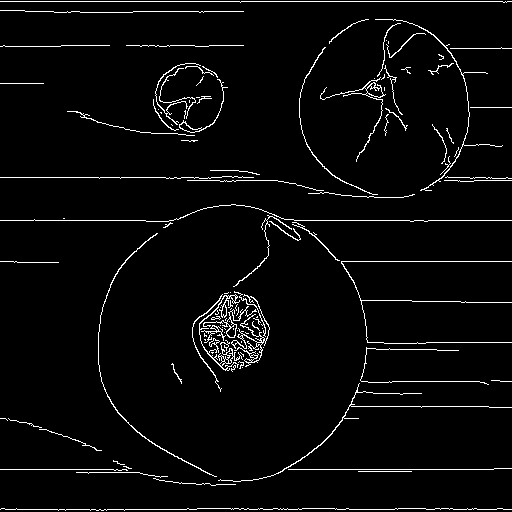

In [125]:
display(example1.canny_data) 

pkl.dump([example1, example2], open("evaldata/cannytest.pkl", "wb"))

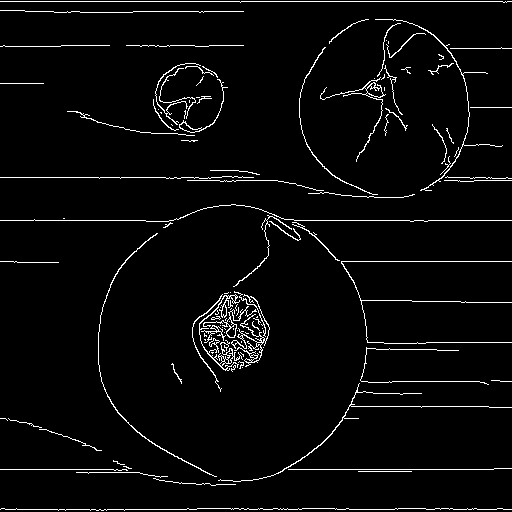

In [127]:
pkl.load(open("evaldata/cannytest.pkl", "rb"))[0].canny_data

In [128]:
# visualize

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 289
(774, 289)


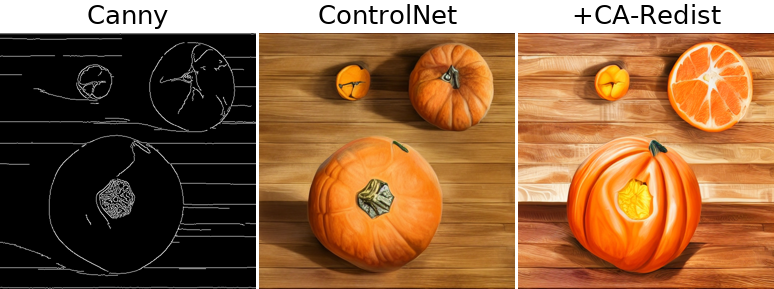

In [143]:
whichbatch = 0
whichseed = 2

imgs = []
labeltexts = []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_canny/generated_cannytest.pkl_1", whichbatch, whichseed, use_seg=True)
paramtext = DrawText(f"Canny", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_canny/generated_cannytest.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"ControlNet", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_canny/generated_cannytest.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"+CA-Redist", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
/home/lukovdg1/.conda/envs/control-v11/lib/python3.8/site-packages/cv2/qt/fonts/DejaVuSans.ttf
774 289
(774, 289)


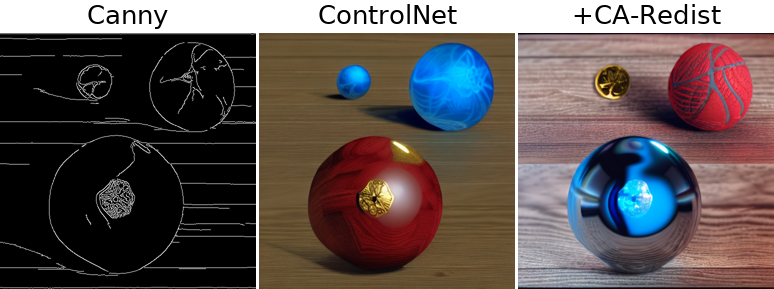

In [144]:
whichbatch = 1
whichseed = 4

imgs = []
labeltexts = []

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_canny/generated_cannytest.pkl_1", whichbatch, whichseed, use_seg=True)
paramtext = DrawText(f"Canny", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_global_v5_exp_1_canny/generated_cannytest.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"ControlNet", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

img, args = get_image_draw("/USERSPACE/lukovdg1/controlnet11/checkpoints/v5/checkpoints_coco_posattn5a_v5_exp_5_canny/generated_cannytest.pkl_1", whichbatch, whichseed)
paramtext = DrawText(f"+CA-Redist", fontsize=26, width=img.get_width(), height=30, color=(0,0,0), bold=False, italic=False)

imgs.append(img)
labeltexts.append(paramtext)

    
todraw_ediffi = DrawRow(*imgs)
todraw_ediffi_labels = DrawRow(*labeltexts)
todraw_ediffi = DrawCol(todraw_ediffi_labels, todraw_ediffi)

print(todraw_ediffi.get_width(), todraw_ediffi.get_height())
img = todraw_ediffi.drawself()
print(img.size)
display(img)

### Example 3: rabbit mage